# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

1. Bagging berfungsi mengurang variance (overfitting), setiap model dilatih pada sampel acak yang baru.

2. Boosting berfungsi mengurangi bias (underfitting), semua model dilatih secara independen. setiap model berfokus pada data yang salah diprediksi oleh model sebelumnya, dalam hal ini data yang salah akan diberi bobot yang lebih besar. Hasil akhirnya berupa rata-rata atau mayoritas dari semua prediksi.

# Import Data & Libraries

In [41]:
# import semua libraries yang akan dibutuhkan
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
# import semua libraries untuk Random Forest from Scracth
import numpy as np
from DecisionTree import DecisionTree
from collections import Counter
from RandomForest import RandomForest

ModuleNotFoundError: No module named 'DecisionTree'

In [62]:
# import semua libraries untuk Gradient Boosting from Scractch with Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target  # y = 0 (ganas/malignant) dan y = 1 (jinak/benign)

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
X_df = pd.DataFrame(data.data, columns = data.feature_names)

y_df = pd.DataFrame(data.target, columns = ['target'])

print("data X")
X_df.head()

data X


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
print("data y")
y_df.head()

data y


,target
0,0
1,0
2,0
3,0
4,0


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [47]:
clf = RandomForestClassifier(random_state=42) # gunakan RandomForestClassifier dari Sklearn
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Akurasi dari model: {accuracy}")

Akurasi dari model: 0.9649122807017544


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [48]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            DecisionTree(max_depth = self.max_depth,
                         min_samples_split = self.min_samples_split,
                         n_features = self.n_features)

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # [[1,0,1,1],[0,0,1,1],[]]
        # [[1,0]]
        tree_preds = np.swapaxes(predicitions, 0, 1)
        predictions = np.array([self.most_common_label(pred) for pred in tree_preds] )
        return predictions

## Predict Using Random Forest

In [49]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik accuracy
acc = accuracy(y_test, predictions)
print(acc)

NameError: name 'DecisionTree' is not defined

# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [63]:
# define and train the model using GradientBoostingClassifier from Sklearn
gbs = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=3,
                                 random_state=42)
gbs.fit(X_train, y_train)

preds = gbs.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Hasil Prediksi: {preds}")

Hasil Prediksi: [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            Fm = Fm + self.lr*h_i.predict(X)

            # Plotting
            axs[i].plot(y, ".")
            axs[i].plot(Fm, ".")
            axs[i].set_title(str(i))
            axs[i].axis("off")

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


## Predict Using Gradient Boosting

IndexError: index 25 is out of bounds for axis 0 with size 25

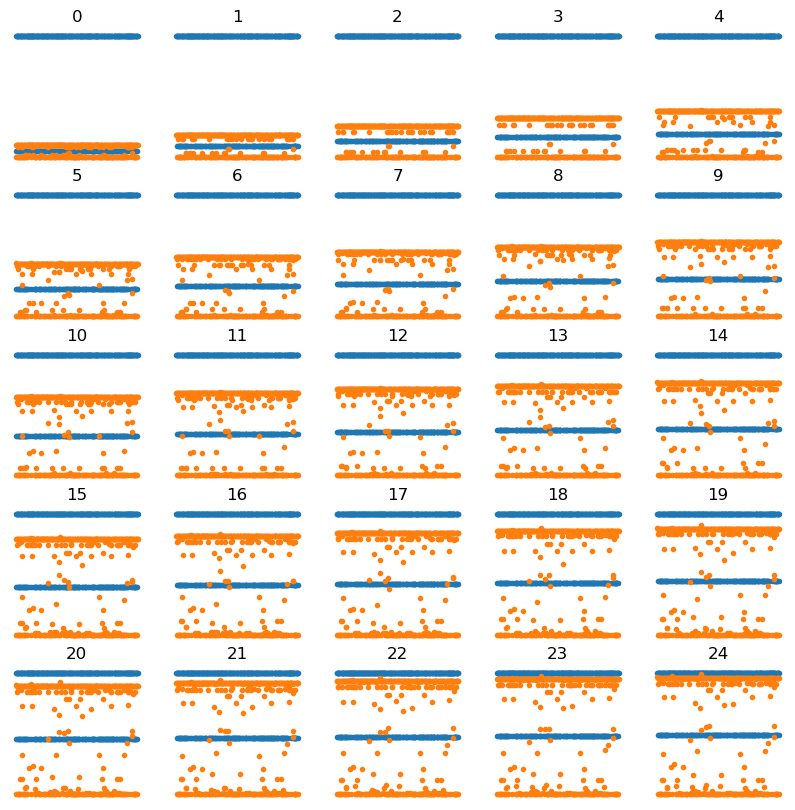

In [58]:
# define and train the model
params = {'max_depth': 3, 'random_state': 42}

clf = gradientBoostingClassifier(lr=0.1, n_estimators=50)
clf.fit(X_train, y_train, **params)

In [59]:
# get predictions:
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Hasil prediksi: {preds}")
print(f"Hasil akurasi: {accuracy}")

Hasil prediksi: [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]
Hasil akurasi: 0.956140350877193


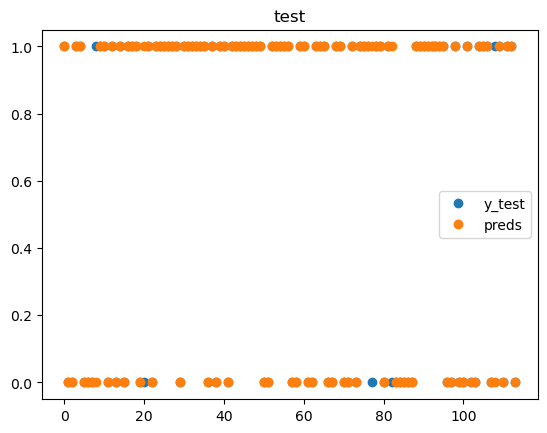

In [60]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()